In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
%matplotlib inline



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


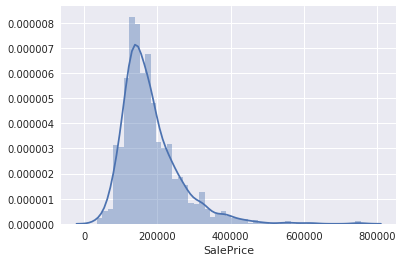

In [36]:
df_train = pd.read_csv('dataset/train.csv')
print df_train['SalePrice'].describe()
print sns.distplot(df_train['SalePrice']);



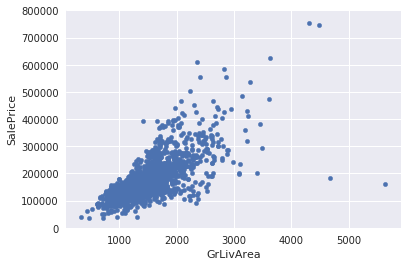

In [37]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# print df_train[var]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


37


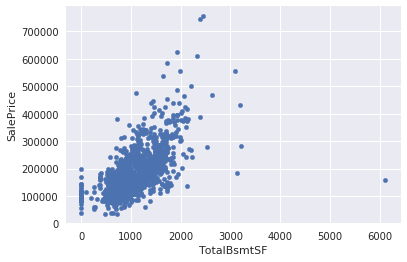

In [38]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']] , axis= 1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice');
a =  df_train['TotalBsmtSF']
print list(a).count(0)


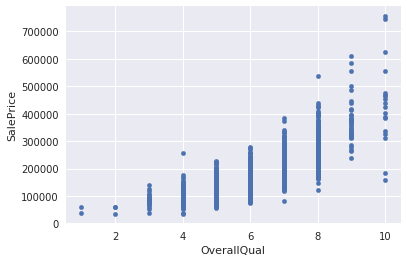

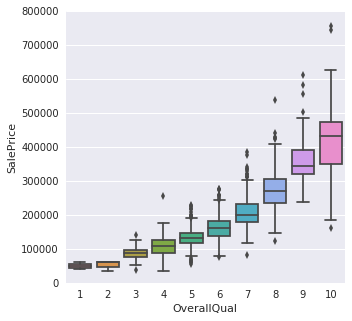

In [39]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice');
f , ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(-0.5, 111.5, 0, 800000)

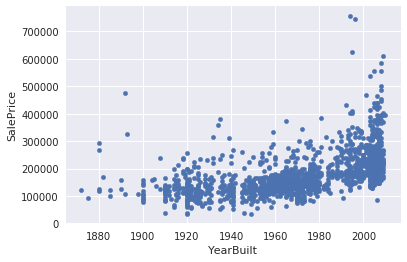

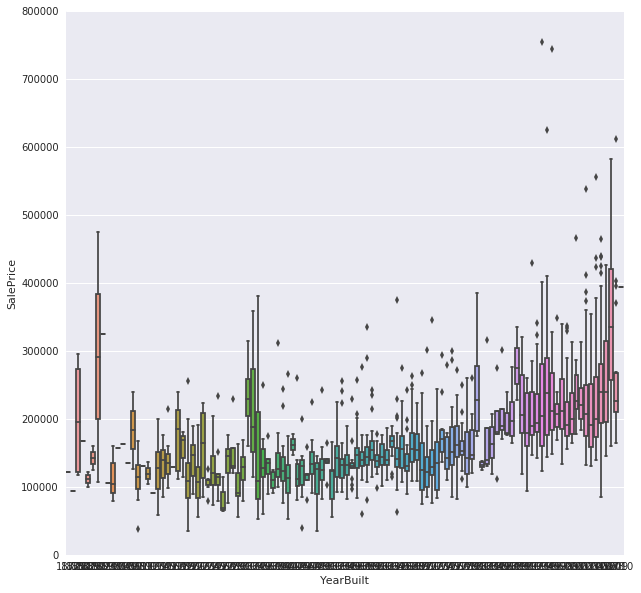

In [40]:
var =  'YearBuilt'
data =  pd.concat([df_train['SalePrice'], df_train[var]] , axis=1)
data.plot.scatter(x=var,y='SalePrice');
f , ax =plt.subplots(figsize=(10,10))
fig =  sns.boxplot(x=var , y="SalePrice" , data = data)
fig.axis(ymin= 0 ,ymax=800000 )



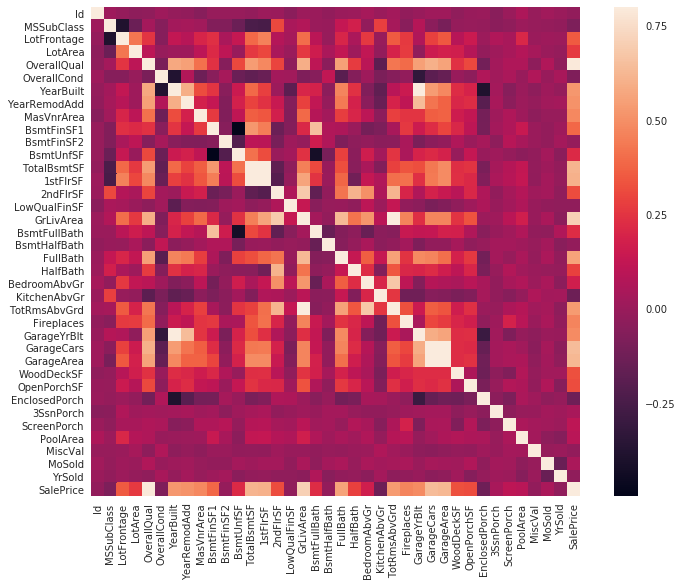

In [41]:
corrmat = df_train.corr()
f ,ax =  plt.subplots(figsize=(12,9)) #template to place the data
sns.heatmap(corrmat,vmax=.8,square=True);

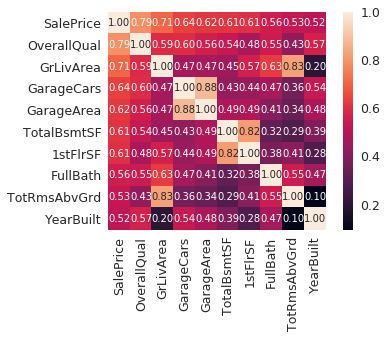

In [42]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
#corrmat is to have correaltion between given colums

cm = np.corrcoef(df_train[cols].values.T)
#T is transpose of the matrix fetched
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)


plt.show()

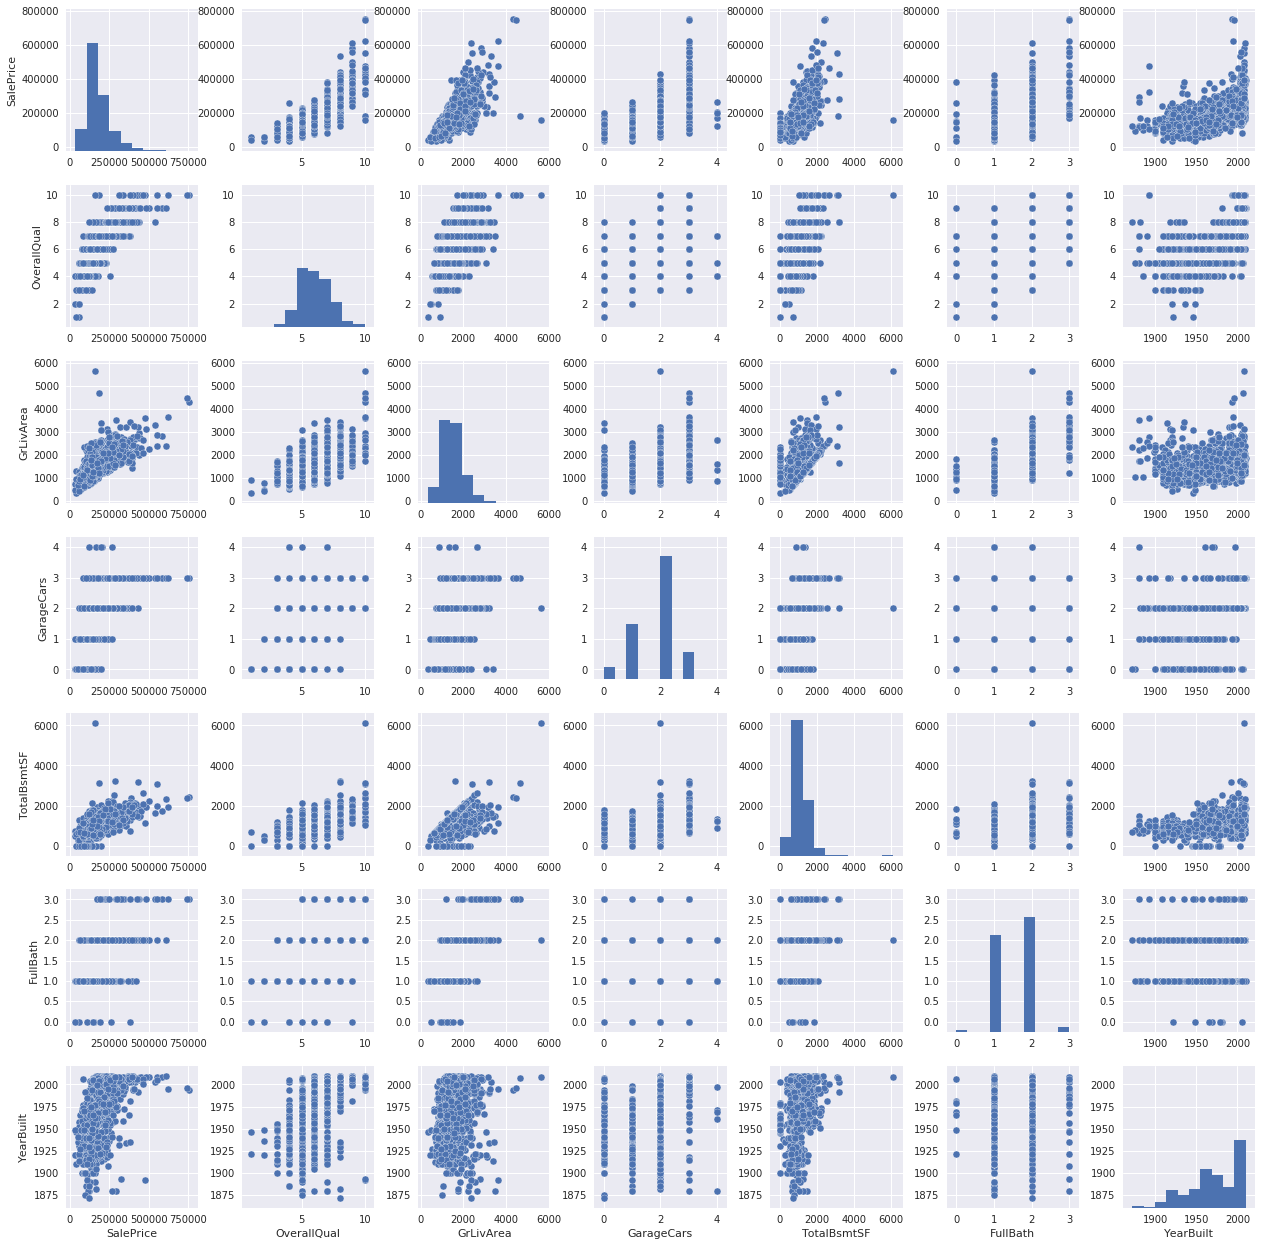

In [43]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# print cols
sns.pairplot(df_train[cols], size = 2.5)
plt.show();


In [44]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [45]:

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [46]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);



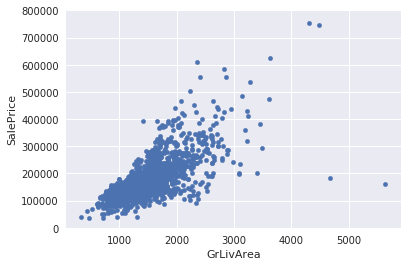

In [47]:


var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'] ,df_train[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice' , ylim =(0,800000));



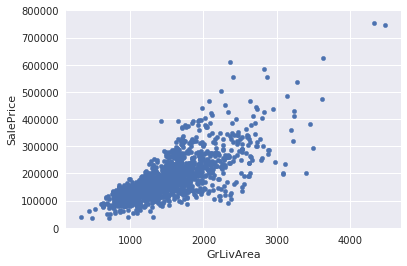

In [48]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'] ,df_train[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice' , ylim =(0,800000));




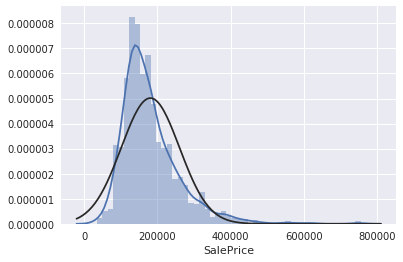

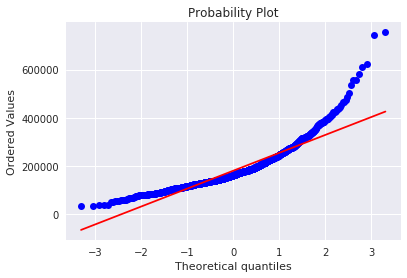

In [49]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt) 

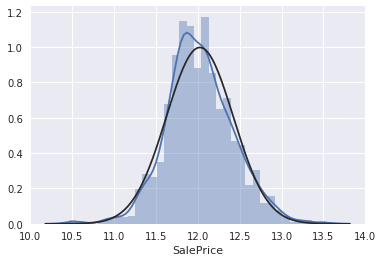

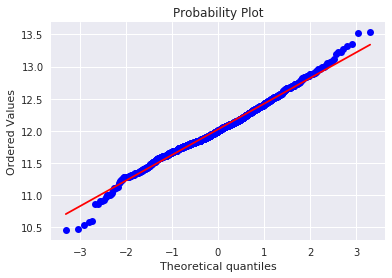

In [50]:

df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

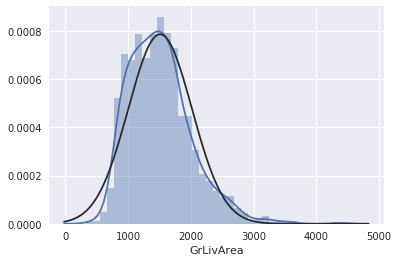

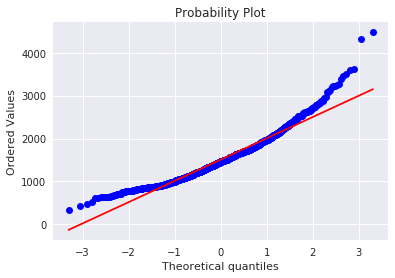

In [51]:
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot  = plt)


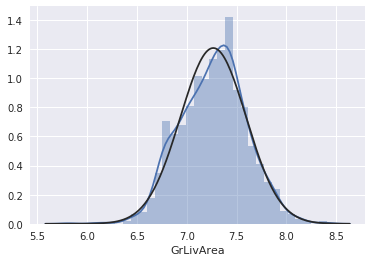

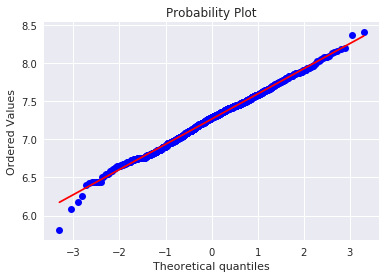

In [52]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)


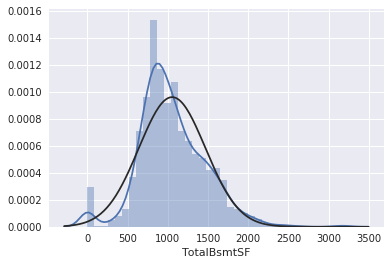

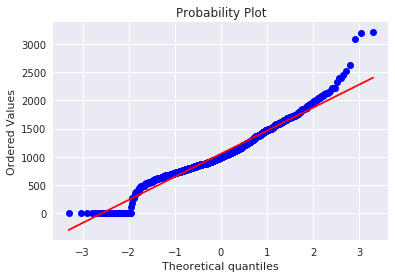

In [53]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


In [54]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
# print df_train['HasBsmt']



In [55]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


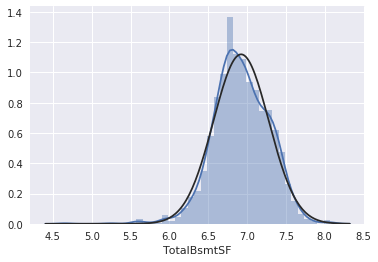

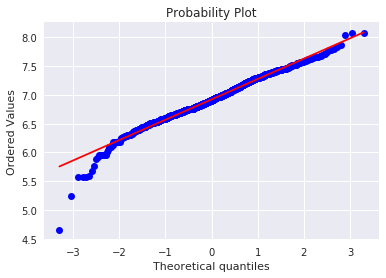

In [56]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [57]:
df_train = pd.get_dummies(df_train)